# Problématique
Quel lien peut-on établir entre la physico-chimie de l’eau et son état biologique ?

In [3]:
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install zstandard

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import zstandard as zstd

In [2]:
def read_zst_csv(file_path):
    with open(file_path, "rb") as f:
        dctx = zstd.ZstdDecompressor()
        with dctx.stream_reader(f) as reader:
            decompressed_data = pd.read_csv(reader)
    return decompressed_data

# Chargement des données

In [3]:
hydrobio_data = read_zst_csv("data/donnees_hydrobio.csv.zst")

In [4]:
with open("data/donnees_physicochimie.csv.zst", "rb") as f:
    dctx = zstd.ZstdDecompressor()
    with dctx.stream_reader(f) as reader:
        data = pd.read_csv(reader)

    pc_list_cols = data.columns
    pc_list_cat = pc_list_cols[
        pc_list_cols.str.startswith(("Lb", "Nom", "Mnemo", "Cd", "Sym", "Com"))
    ]

    pc_dict_cat = {col: "category" for col in pc_list_cat}

    with dctx.stream_reader(f) as reader:
        physicochimie_data = pd.read_csv(
            "data/donnees_physicochimie.csv.zst",
            sep=",",
            engine="c",
            escapechar="\\",
            dtype=pc_dict_cat,
            parse_dates=[7],
            iterator=False,
        )

/var/folders/pg/90zs2bzx10v6865khn4m0n3c0000gn/T/ipykernel_93815/4199736906.py:4: DtypeWarning: Columns (6,26,31,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(reader)


In [5]:
with open("data/stations_hb.csv.zst", "rb") as f:
    dctx = zstd.ZstdDecompressor()
    with dctx.stream_reader(f) as reader:
        station_data = pd.read_csv(reader, sep=';',escapechar = '\\')

station_data = station_data[station_data['CdStationMesureEauxSurface'].str.isnumeric()]

# Analyse des données

## données phyco-chimiques

In [25]:
physicochimie_data.info()
physicochimie_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8917443 entries, 0 to 8917442
Data columns (total 49 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   CdStationMesureEauxSurface  category      
 1   LbStationMesureEauxSurface  category      
 2   CdSupport                   category      
 3   LbSupport                   category      
 4   CdFractionAnalysee          category      
 5   LbFractionAnalysee          category      
 6   CdPrelevement               category      
 7   DatePrel                    datetime64[ns]
 8   HeurePrel                   object        
 9   CdParametre                 category      
 10  LbLongParamètre             category      
 11  RsAna                       float64       
 12  CdUniteMesure               category      
 13  SymUniteMesure              category      
 14  CdRqAna                     category      
 15  MnemoRqAna                  category      
 16  CdInsituAna       

,CdStationMesureEauxSurface,LbStationMesureEauxSurface,CdSupport,LbSupport,CdFractionAnalysee,LbFractionAnalysee,CdPrelevement,DatePrel,HeurePrel,CdParametre,...,CommentairesAna,ComResultatAna,CdRdd,NomRdd,CdProducteur,NomProducteur,CdPreleveur,NomPreleveur,CdLaboratoire,NomLaboratoire
0,05005600,La Béronne en aval de Melle,3,Eau,23,Eau brute,200561,2005-07-06,10:55:00,1305,...,NaN,NaN,0400000779,Réseau de suivi de la qualité des eaux superfi...,25160178700053,ETABLISSEMENT PUBLIC TERRITORIAL DE BASSIN CHA...,22790001600014,DEPARTEMENT DES DEUX SEVRES,379,Direction Départementale de l'Agriculture et d...
1,05200115,Le Laurhibar à Saint Jean le Vieux,3,Eau,23,Eau brute,203218,2005-09-28,11:15:00,1313,...,NaN,NaN,0500000249,Réseau de suivi de la qualité des eaux superfi...,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,22640001800066,DEPARTEMENT DES PYRENEES ATLANTIQUES - CENTR R...,22640001800066,DEPARTEMENT DES PYRENEES ATLANTIQUES - CENTR R...
2,05001800,L'Arnoult en amont de Pont l'Abbé d'Arnoult,3,Eau,23,Eau brute,198487,2005-01-19,15:00:00,1301,...,NaN,NaN,NaN,NaN,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE
3,05001800,L'Arnoult en amont de Pont l'Abbé d'Arnoult,3,Eau,23,Eau brute,198487,2005-01-19,15:00:00,1302,...,NaN,NaN,NaN,NaN,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE
4,05001800,L'Arnoult en amont de Pont l'Abbé d'Arnoult,3,Eau,23,Eau brute,198487,2005-01-19,15:00:00,1303,...,NaN,NaN,NaN,NaN,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE,18310006400033,AGENCE DE L'EAU ADOUR GARONNE


## données stations

In [26]:
station_data.info()
station_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6472 entries, 0 to 6471
Data columns (total 39 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CdStationMesureEauxSurface                 6472 non-null   object 
 1   LbStationMesureEauxSurface                 6472 non-null   object 
 2   DurStationMesureEauxSurface                1296 non-null   float64
 3   CoordXStationMesureEauxSurface             6472 non-null   float64
 4   CoordYStationMesureEauxSurface             6472 non-null   float64
 5   CdProjStationMesureEauxSurface             6472 non-null   int64  
 6   LibelleProjection                          6472 non-null   object 
 7   CodeCommune                                6470 non-null   object 
 8   LbCommune                                  6470 non-null   object 
 9   CodeDepartement                            6470 non-null   object 
 10  LbDepartement                

,CdStationMesureEauxSurface,LbStationMesureEauxSurface,DurStationMesureEauxSurface,CoordXStationMesureEauxSurface,CoordYStationMesureEauxSurface,CdProjStationMesureEauxSurface,LibelleProjection,CodeCommune,LbCommune,CodeDepartement,...,DateMAJInfosStationMesureEauxSurface,FinaliteStationMesureEauxSurface,LocPreciseStationMesureEauxSurface,CodeNatureStationMesureEauxSurface,LibelleNatureStationMesureEauxSurface,AltitudePointCaracteritisque,PkPointTronconEntiteHydroPrincipale,PremierMoisAnneeEtiage,SuperficieBassinVersantReel,SuperficieBassinVersantTopo
0,01000477,LA SLACK À RINXENT (62),NaN,610228.78,7078879.90,26,RGF93 / Lambert 93,62711,RINXENT,62,...,2015-12-14 00:00:00,NaN,Lieu-dit Ferme du Château. La Planche du Devin,M,Station de mesure Manuelle,0.0,980.48,6.0,NaN,0.0
1,01000602,COLOGNE à BUIRE COURCELLES (80),NaN,700318.40,6980033.60,26,RGF93 / Lambert 93,80150,BUIRE-COURCELLES,80,...,2015-12-14 00:00:00,NaN,MOULIN DE BINARD PONT D 194 E,M,Station de mesure Manuelle,0.0,992.58,6.0,NaN,0.0
2,01000605,L'OMIGNON À DEVISE (80),NaN,700279.85,6973284.26,26,RGF93 / Lambert 93,80239,DEVISE,80,...,2015-12-14 00:00:00,NaN,ROUTE DE L'EGLISE,M,Station de mesure Manuelle,0.0,993.69,6.0,NaN,0.0
3,01001122,L'HELPE MAJEURE À EPPE SAUVAGE (59),NaN,784224.69,7002720.08,26,RGF93 / Lambert 93,59198,EPPE-SAUVAGE,59,...,2011-06-07 00:00:00,NaN,PONT DE LA D119,M,Station de mesure Manuelle,183.0,947.01,6.0,NaN,NaN
4,01001131,HELPE MINEURE à GRAND FAYT (59),NaN,757716.99,7002035.12,26,RGF93 / Lambert 93,59270,GRAND-FAYT,59,...,2016-01-06 00:00:00,NaN,ANCIEN MOULIN,M,Station de mesure Manuelle,0.0,987.60,6.0,NaN,0.0


## données hydrobiologiques

In [27]:
hydrobio_data.info()
hydrobio_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43535 entries, 0 to 43534
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          43535 non-null  int64  
 1   CdStationMesureEauxSurface          43535 non-null  int64  
 2   LbStationMesureEauxSurface          43535 non-null  object 
 3   CdPointEauxSurf                     43115 non-null  float64
 4   DateDebutOperationPrelBio           43535 non-null  object 
 5   CdSupport                           43535 non-null  int64  
 6   LbSupport                           43535 non-null  object 
 7   DtProdResultatBiologique            14829 non-null  object 
 8   CdParametreResultatBiologique       43535 non-null  int64  
 9   LbLongParametre                     43535 non-null  object 
 10  ResIndiceResultatBiologique         43522 non-null  float64
 11  CdUniteMesure                       43535

,Unnamed: 0,CdStationMesureEauxSurface,LbStationMesureEauxSurface,CdPointEauxSurf,DateDebutOperationPrelBio,CdSupport,LbSupport,DtProdResultatBiologique,CdParametreResultatBiologique,LbLongParametre,...,CdUniteMesure,SymUniteMesure,CdRqIndiceResultatBiologique,MnemoRqAna,CdMethEval,RefOperationPrelBio,CdProducteur,NomProducteur,CdAccredRsIndiceResultatBiologique,MnAccredRsIndiceResultatBiologique
0,0,2000990,LE LERTZBACH À HEGENHEIM,1.0,2010-07-20,13,Macroinvertébrés aquatiques,NaN,7613,Indice Invertébrés Multimétrique (I2M2),...,X,X,1,Résultat > seuil de quantification et < au seu...,NaN,1814647,18570301400018,AGENCE DE L'EAU RHIN MEUSE,0.0,Inconnu
1,1,2001000,L'AUGRABEN À BARTENHEIM,2.0,2010-09-20,13,Macroinvertébrés aquatiques,NaN,7613,Indice Invertébrés Multimétrique (I2M2),...,X,X,1,Résultat > seuil de quantification et < au seu...,NaN,1814648,18570301400018,AGENCE DE L'EAU RHIN MEUSE,0.0,Inconnu
2,2,2001000,L'AUGRABEN À BARTENHEIM,2.0,2011-08-03,13,Macroinvertébrés aquatiques,NaN,7613,Indice Invertébrés Multimétrique (I2M2),...,X,X,1,Résultat > seuil de quantification et < au seu...,NaN,2148304,18570301400018,AGENCE DE L'EAU RHIN MEUSE,0.0,Inconnu
3,3,2001000,L'AUGRABEN À BARTENHEIM,2.0,2012-08-16,13,Macroinvertébrés aquatiques,NaN,7613,Indice Invertébrés Multimétrique (I2M2),...,X,X,1,Résultat > seuil de quantification et < au seu...,NaN,2147990,18570301400018,AGENCE DE L'EAU RHIN MEUSE,0.0,Inconnu
4,4,2001025,LE RIEDGRABEN À LANDSER,5.0,2010-07-20,13,Macroinvertébrés aquatiques,NaN,7613,Indice Invertébrés Multimétrique (I2M2),...,X,X,1,Résultat > seuil de quantification et < au seu...,NaN,1814649,18570301400018,AGENCE DE L'EAU RHIN MEUSE,0.0,Inconnu


## Analyse de séquence temporelle pour un paramètre
### Exemple avec une seule station pour le nitrate

In [ ]:
analyse_station = physicochimie_data[physicochimie_data["CdStationMesureEauxSurface"] == "01000477"] # on prend un une station au hasard               

In [51]:
pd.set_option("display.max_columns", None)
analyse_station.head()

,CdStationMesureEauxSurface,LbStationMesureEauxSurface,CdSupport,LbSupport,CdFractionAnalysee,LbFractionAnalysee,CdPrelevement,DatePrel,HeurePrel,CdParametre,LbLongParamètre,RsAna,CdUniteMesure,SymUniteMesure,CdRqAna,MnemoRqAna,CdInsituAna,LbInsituAna,ProfondeurPrel,CdDifficulteAna,MnemoDifficulteAna,LdAna,LqAna,LsAna,IncertAna,CdMetFractionnement,NomMetFractionnement,CdMethode,NomMethode,RdtExtraction,CdMethodeExtraction,NomMethodeExtraction,CdAccreAna,MnemoAccredAna,AgreAna,CdStatutAna,MnemoStatutAna,CdQualAna,LbQualAna,CommentairesAna,ComResultatAna,CdRdd,NomRdd,CdProducteur,NomProducteur,CdPreleveur,NomPreleveur,CdLaboratoire,NomLaboratoire
5028163,01000477,LA SLACK À RINXENT (62),3,Eau,23,Eau brute,01000477201604081135222223,2016-04-08,11:35:00,1301,Température de l'Eau,8.9,27,°C,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,500,Qualité de l'eau - Mesure de la température,NaN,NaN,NaN,0,Inconnu,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,0100000101/0100000107,NaN,18591178100028,AGENCE DE L EAU ARTOIS PICARDIE,44523596300011,CENTRE D'ANALYSES ET DE RECHERCHES - CAR,44523596300011,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
5028164,01000477,LA SLACK À RINXENT (62),3,Eau,23,Eau brute,01000477201604081135222223,2016-04-08,11:35:00,1302,Potentiel en Hydrogène (pH),8.2,264,unité pH,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,NaN,NaN,NaN,NaN,NaN,380,Essais des eaux - Mesure électrométrique du pH...,NaN,NaN,NaN,0,Inconnu,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,0100000101/0100000107,NaN,18591178100028,AGENCE DE L EAU ARTOIS PICARDIE,44523596300011,CENTRE D'ANALYSES ET DE RECHERCHES - CAR,44523596300011,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
5028165,01000477,LA SLACK À RINXENT (62),3,Eau,23,Eau brute,01000477201604081135222223,2016-04-08,11:35:00,1303,Conductivité à 25°C,630.0,147,µS/cm,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,30.0,NaN,NaN,NaN,NaN,231,Qualité de l'eau - Détermination de la conduct...,NaN,NaN,NaN,0,Inconnu,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,0100000101/0100000107,NaN,18591178100028,AGENCE DE L EAU ARTOIS PICARDIE,44523596300011,CENTRE D'ANALYSES ET DE RECHERCHES - CAR,44523596300011,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
5028166,01000477,LA SLACK À RINXENT (62),3,Eau,23,Eau brute,01000477201604081135222223,2016-04-08,11:35:00,1311,Oxygène dissous,11.7,175,mg(O2)/L,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,0.1,NaN,NaN,NaN,NaN,238,Qualité de l'eau - Dosage de l'oxygène dissous...,NaN,NaN,NaN,0,Inconnu,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,0100000101/0100000107,NaN,18591178100028,AGENCE DE L EAU ARTOIS PICARDIE,44523596300011,CENTRE D'ANALYSES ET DE RECHERCHES - CAR,44523596300011,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
5028167,01000477,LA SLACK À RINXENT (62),3,Eau,23,Eau brute,01000477201604081135222223,2016-04-08,11:35:00,1312,Taux de saturation en oxygène,101.4,243,%,1,Résultat > seuil de quantification et < au seu...,1,In situ,NaN,0,Difficultés inconnues,NaN,1.0,NaN,NaN,NaN,NaN,238,Qualité de l'eau - Dosage de l'oxygène dissous...,NaN,NaN,NaN,0,Inconnu,NaN,2,Donnée contrôlée niveau 1 (données contrôlées),1,Correcte,NaN,NaN,0100000101/0100000107,NaN,18591178100028,AGENCE DE L EAU ARTOIS PICARDIE,44523596300011,CENTRE D'ANALYSES ET DE RECHERCHES - CAR,44523596300011,CENTRE D'ANALYSES ET DE RECHERCHES - CAR


In [ ]:
releve_nitrate = analyse_station[analyse_station["CdParametre"] == "1340"][
    ["DatePrel", "HeurePrel", "RsAna", "SymUniteMesure"]
]

releve_nitrate["DateTime"] = pd.to_datetime(
    releve_nitrate["DatePrel"].astype(str)
    + " "
    + releve_nitrate["HeurePrel"].astype(str)
)

releve_nitrate.drop(columns=["DatePrel", "HeurePrel"], inplace=True)

releve_nitrate.set_index("DateTime", inplace=True)

releve_nitrate.sort_index(inplace=True)

releve_nitrate.describe()

,RsAna
count,72.000000
mean,16.931944
std,4.112017
min,7.200000
25%,14.000000
50%,17.000000
75%,20.000000
max,27.700000


<Axes: title={'center': 'Evolution du nitrates (mg(NO3)/l) dans le temps'}, xlabel='DateTime'>

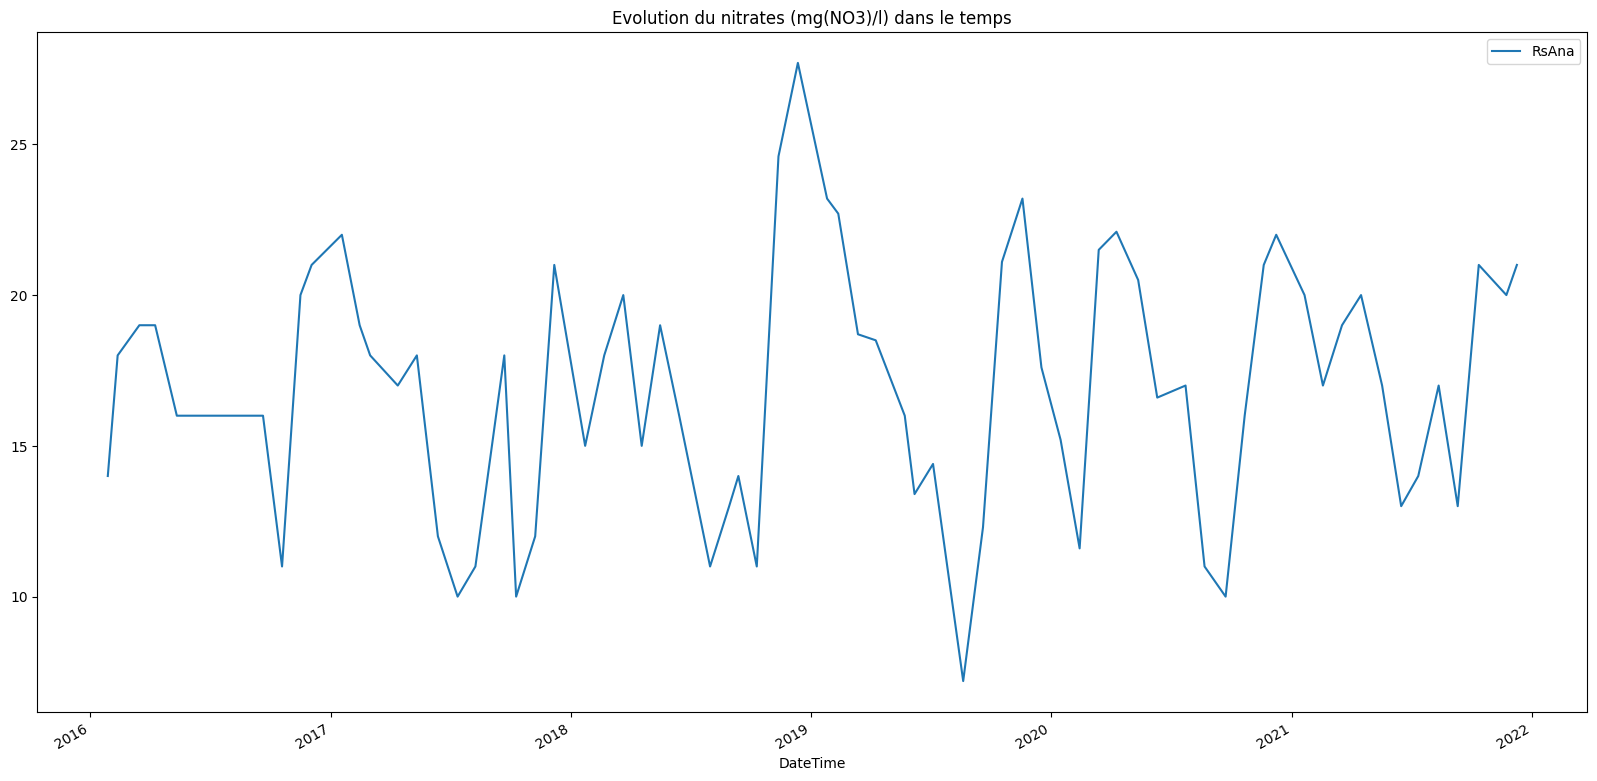

In [ ]:
releve_nitrate.plot(y="RsAna", figsize=(20, 10), title="Evolution du nitrates (mg(NO3)/l) dans le temps")


### Analyse de l'évolution du nitrate pour toutes les stations

In [78]:
stations_nitrate = physicochimie_data[physicochimie_data["CdParametre"] == "1340"]

stations_nitrate["DateTimePrel"] = pd.to_datetime(
    stations_nitrate["DatePrel"].astype(str)
    + " "
    + stations_nitrate["HeurePrel"].astype(str),
    errors="coerce",
)

grouped = stations_nitrate.groupby("CdStationMesureEauxSurface")

time_series_dict = {}

for station, group in grouped:

    group = group.set_index("DateTimePrel")

    group.sort_index(inplace=True)

    time_series_dict[station] = group["RsAna"]

/var/folders/pg/90zs2bzx10v6865khn4m0n3c0000gn/T/ipykernel_93815/2355344578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_nitrate["DateTimePrel"] = pd.to_datetime(
/var/folders/pg/90zs2bzx10v6865khn4m0n3c0000gn/T/ipykernel_93815/2355344578.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = stations_nitrate.groupby("CdStationMesureEauxSurface")


In [85]:
# Nombre de stations avec des données de nitrates
print("Nombre de stations avec des données de nitrates : ", len(time_series_dict))

# Prendre les 10 premières stations
stations = list(time_series_dict.keys())[:5]

time_series_dict_short = {station: time_series_dict[station] for station in stations}

print("Nombre de stations avec des données de nitrates : ", time_series_dict_short)

Nombre de stations avec des données de nitrates :  8810
Nombre de stations avec des données de nitrates :  {'05001800': DateTimePrel
2007-01-18 12:45:00    45.6
2007-03-15 12:30:00    50.6
2007-05-22 14:30:00    38.4
2007-07-19 13:00:00    36.2
2007-09-13 13:45:00    39.9
2007-11-15 09:15:00    40.4
2008-01-21 14:30:00    51.6
2008-03-17 09:05:00    39.0
2008-05-19 09:15:00    39.5
2008-07-21 14:55:00    40.3
2008-09-15 09:35:00    33.8
2008-11-18 15:50:00    34.8
2009-01-19 09:15:00    41.2
2009-03-19 14:45:00    43.9
2009-05-11 16:05:00    41.0
2009-07-20 10:30:00    37.9
2009-09-14 14:40:00    38.5
2009-11-16 08:00:00    38.6
2010-09-02 09:00:00    32.9
2010-09-22 09:10:00    39.9
2010-10-13 10:15:00    39.3
2010-11-04 14:30:00    38.8
2010-11-25 16:00:00    51.3
2010-12-15 09:00:00    58.8
2011-01-26 09:00:00    49.1
2011-03-21 08:30:00    49.2
2011-05-19 08:50:00    40.5
2011-07-25 08:50:00    32.5
2011-09-19 09:20:00    39.3
2011-11-21 09:00:00    34.1
2012-01-25 08:50:00    47.1

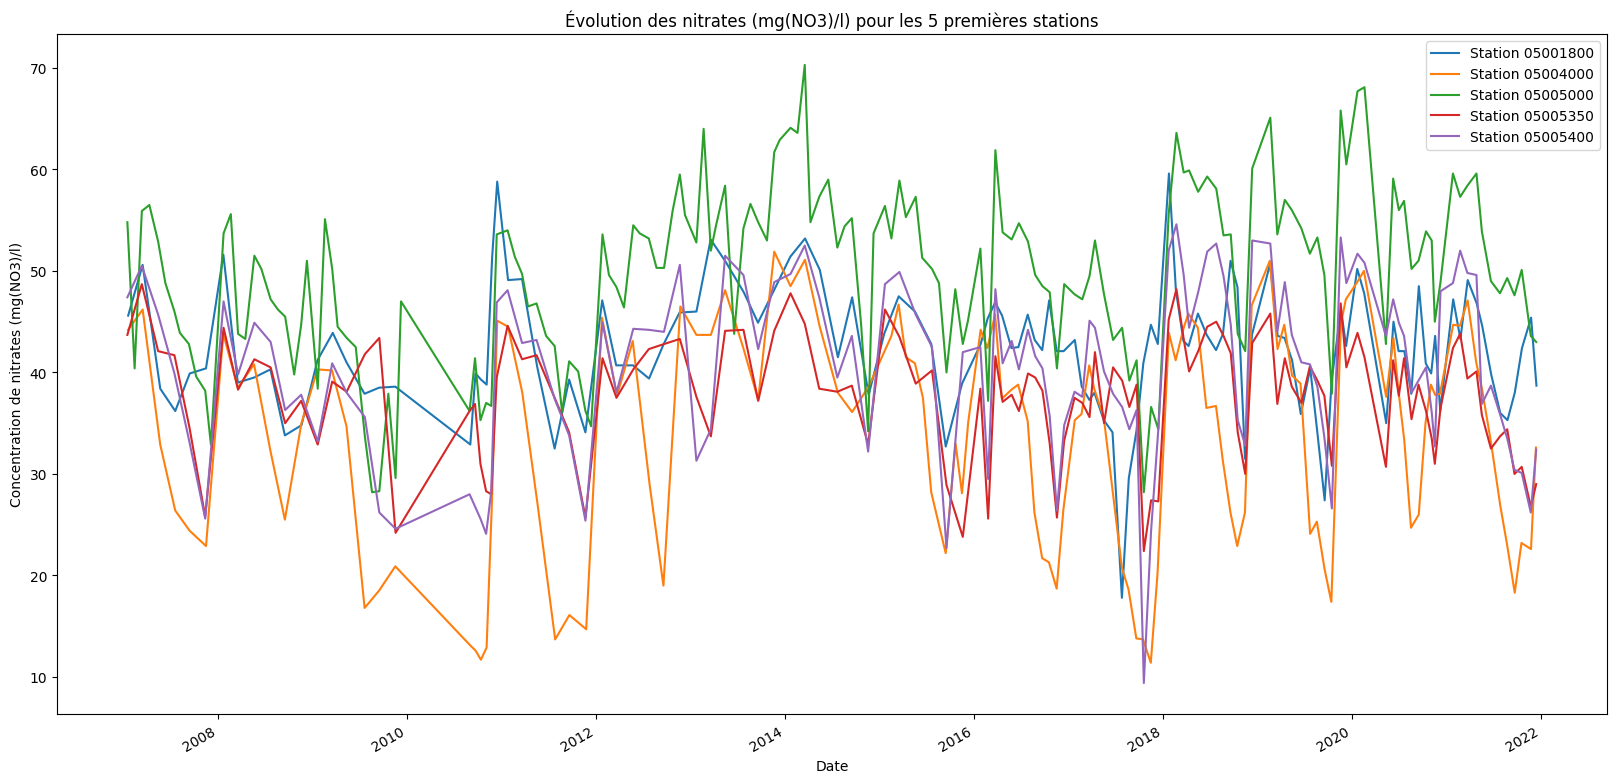

In [93]:
# Créer une nouvelle figure
plt.figure(figsize=(20, 10))

# Afficher les 10 premières stations sur le même graphique
for i, (station, ts) in enumerate(time_series_dict_short.items()):
    if i >= 5:
        break
    ts.plot(label=f"Station {station}")

# Ajouter un titre et des étiquettes aux axes
plt.title("Évolution des nitrates (mg(NO3)/l) pour les 5 premières stations")
plt.xlabel("Date")
plt.ylabel("Concentration de nitrates (mg(NO3)/l)")

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()